# PCA 적용해보기 - 1

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
iris_df = pd.DataFrame(iris.data, columns=columns)
iris_df['target'] = iris.target
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


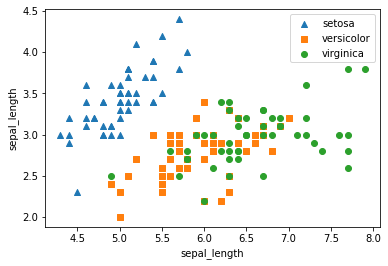

In [2]:
# 두 가지 변수를 기준으로 label값에 따라 데이터 분포도 살펴보기
markers = ['^', 's', 'o']

# 각 label값 별로 산포도 그려보기
for i, marker in enumerate(markers):
    x_axis_data = iris_df[iris_df['target']==i]['sepal_length']
    y_axis_data = iris_df[iris_df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
               label=iris.target_names[i])
plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('sepal_length')
plt.show()

In [3]:
# PCA 수행 시 feature값들을 scaling 해주고 하는 것이 좋다.
# scaling은 보통 평균 0 분산 1로 변환해주는 Standard scaler 적용
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(iris_df.iloc[:,:-1])
iris_scaled.shape

(150, 4)

In [4]:
# PCA로 2개의 feature로 차원 축소하기
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
iris_pca = pca.fit_transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [7]:
pca_columns = ['pca_com1', 'pca_com2']
iris_pca = pd.DataFrame(iris_pca, columns=pca_columns)
iris_pca['target'] = iris.target
iris_pca.head()

,pca_com1,pca_com2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0
3,-2.299384,-0.597395,0
4,-2.389842,0.646835,0


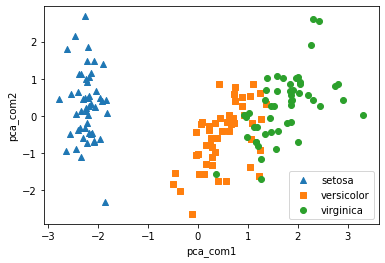

In [8]:
# PCA 변환 후 label별 산포도 확인
markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = iris_pca[iris_pca['target']==i]['pca_com1']
    y_axis_data = iris_pca[iris_pca['target']==i]['pca_com2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,
               label=iris.target_names[i])
plt.legend()
plt.xlabel('pca_com1')
plt.ylabel('pca_com2')
plt.show()

In [9]:
# 원본 데이터에 RandomForest 모델링하기
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier()
scores = cross_val_score(rcf, iris.data, iris.target,
                        scoring='accuracy', cv=5)
print(scores)
print(np.mean(scores))

[0.96666667 0.96666667 0.93333333 0.93333333 1.        ]
0.96


In [10]:
# PCA로 차원축소 한 데이터에 RandomForest 모델링하기
pca_X = iris_pca[['pca_com1','pca_com2']]
rcf = RandomForestClassifier()
scores = cross_val_score(rcf, pca_X, iris.target,
                        scoring='accuracy', cv=5)
print(scores)
print(np.mean(scores))

[0.83333333 0.93333333 0.83333333 0.9        1.        ]
0.9


# PCA 적용해보기 - 2

In [12]:
import os
os.chdir('/Users/younghun/Desktop/gitrepo/data')

In [16]:
# header=1 : 1번 인덱스에 칼럼 이름이 들어가 있으니 1번 인덱스를 칼럼으로 인지해!
df = pd.read_excel('default of credit card clients.xls',
                   sheet_name='Data', header=1)
df.shape

(30000, 25)

In [17]:
df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
# ID, default 컬럼 Drop
X_features = df.drop(['ID','default'], axis=1)

<AxesSubplot:>

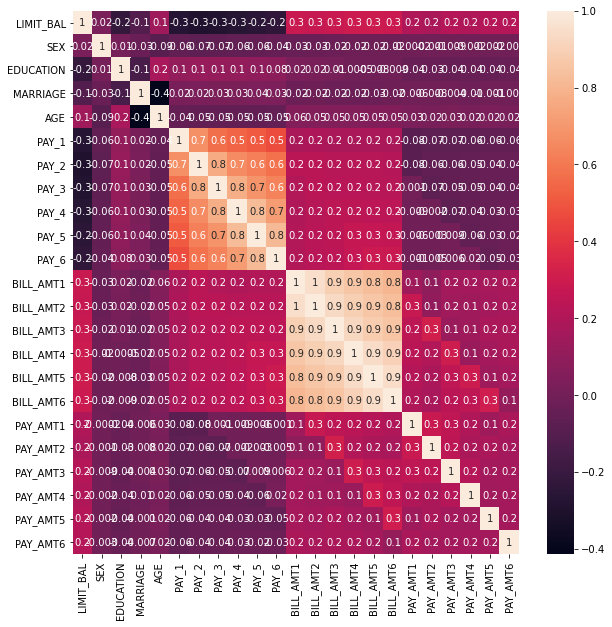

In [22]:
# feature간 상관도 시각화
import seaborn as sns
import matplotlib.pyplot as plt

corr = X_features.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True, fmt='.1g')

In [19]:
# 상관도가 매우 높은 BILL 관련 feature들을 PCA 적용하기
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# BILL관련 변수명 할당
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]

# PCA 수행 전 feature에 Scaling 사전 적용해주기
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
# Scaling 후 PCA
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)

print('PCA Component별 변동성', pca.explained_variance_ratio_)

PCA Component별 변동성 [0.90555253 0.0509867 ]


In [23]:
# 원본 데이터세트와 PCA적용 후 각 모델링 성능 비교
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

rcf = RandomForestClassifier()
scores = cross_val_score(rcf, X_features, y_target,
                        scoring='accuracy', cv=3)
print('원본 데이터셋 - 각 Fold별 정확도 :', scores)
print('원본 데이터셋 - 평균 정확도 :', np.mean(scores))

# Scaling 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# PCA
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target,
                            scoring='accuracy', cv=3)
print('PCA적용 후 데이터셋 - 각 Fold별 정확도 :', scores_pca)
print('PCA적용 후 데이터셋 - 평균 정확도 :', np.mean(scores))

원본 데이터셋 - 각 Fold별 정확도 : [0.8074 0.8205 0.8226]
원본 데이터셋 - 평균 정확도 : 0.8168333333333333
PCA적용 후 데이터셋 - 각 Fold별 정확도 : [0.7922 0.7953 0.802 ]
PCA적용 후 데이터셋 - 평균 정확도 : 0.8168333333333333
